In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("credit_score_prediction.csv")

C:\Users\NetDriver\AppData\Local\Temp\ipykernel_13284\1609878841.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("credit_score_prediction.csv")


In [3]:
# Выведите первые несколько строк датасета, чтобы понять его структуру
print(data.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [4]:
# Получите информацию о датасете, включая типы данных и наличие пропущенных значений
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
pd.set_option('display.max_rows', 5000000)
data.head(100)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Poor
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Poor
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [6]:
# Посмотрите статистические характеристики числовых переменных
print(data.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

In [7]:
# Отбираем только нужные колонки
data = data[['Monthly_Inhand_Salary', 'Age', 'Credit_Score']]

In [8]:
# Заменяем строки на числа в колонке Monthly_Inhand_Salary
data['Monthly_Inhand_Salary']= data['Monthly_Inhand_Salary'].astype(float).fillna(0.0)


In [15]:
# Тоже самое делаем в "Age"
data['Age'].loc(['Age']astype(float).fillna(0.0) = 0)
data['Age']= data['Age'].astype(float).fillna(0.0)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (317511933.py, line 2)

In [ ]:
# Тоже самое делаем в "Age", но переводим категориальные данные в ноль и единицу 
data.loc[data['Credit_Score'] == "Good"] = 1
data.loc[data['Credit_Score'] == "Poor"] = 0
data['Credit_Score']= data['Credit_Score'].astype('boolean').fillna(0.0)

In [ ]:
# Изменяем данные в колонке Duration
#data['Duration'] = data['Duration'].str.split(' ')
#data['Duration'] = data['Duration'].apply(lambda x: int(x[0][:-1])*60 + int(x[1][:-1]) if len(x) > 1 else int(x[0][:-1])*60)

In [ ]:
# Проверяем результат
print(data.head())
print(data.info())

   Monthly_Inhand_Salary   Age Credit_Score
0                    1.0  True            1
1                    1.0  True            1
2                    1.0  True            1
3                    1.0  True            1
4                    1.0  True            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Monthly_Inhand_Salary  100000 non-null  float64
 1   Age                    100000 non-null  boolean
 2   Credit_Score           100000 non-null  object 
dtypes: boolean(1), float64(1), object(1)
memory usage: 1.7+ MB
None


In [ ]:
# Разделим данные на признаки (X) и целевую переменную (y)
X = data[['Total_Stops', 'Duration']]
y = data['Price']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим и обучим модель
model = LinearRegression()
model.fit(X_train, y_train)

# Сделаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценим качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 13744444.445347669
R^2 Score: 0.350573308935218


Коэффициенты регрессии:
Total_Stops: 3491.998531949609
Duration: 1.209885372130347

Уравнение регрессии:
Price = 5426.07511789144 + (3491.998531949609 * Total_Stops) + (1.209885372130347 * Duration)

Корреляция Пирсона:
Total_Stops:
  Total_Stops: 1.0
  Duration: 0.7354138988309226
Duration:
  Total_Stops: 0.7354138988309227
  Duration: 1.0


C:\Users\idemo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


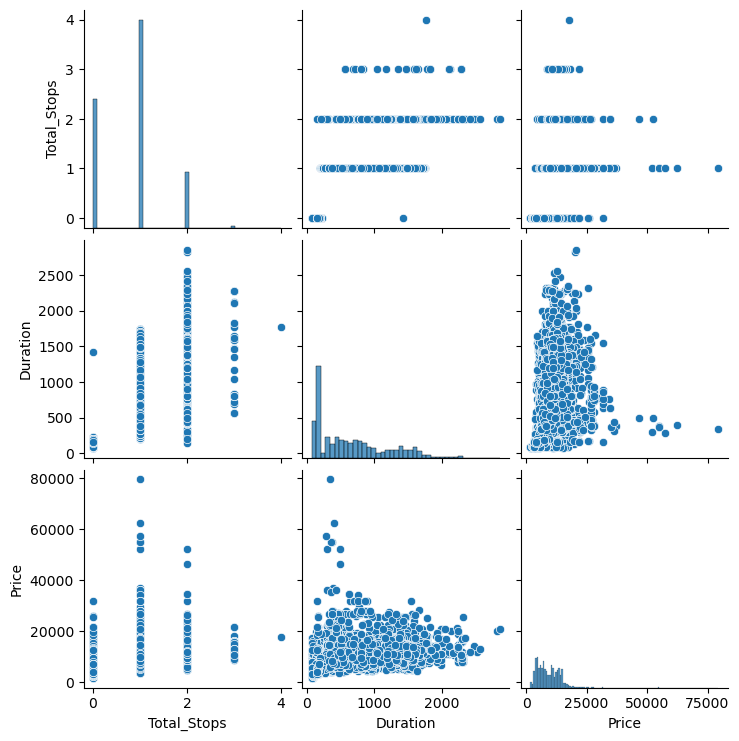

In [ ]:
# Коэффициенты регрессии
coefficients = model.coef_

# Коэффициент сдвига (intercept)
intercept = model.intercept_

# Корреляция Пирсона для каждого признака
correlation_coefficients = np.corrcoef(X_train, rowvar=False)

# Вывод коэффициентов регрессии
print("Коэффициенты регрессии:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[i]}")

# Вывод уравнения регрессии
print("\nУравнение регрессии:")
equation = f"Price = {intercept} + "
for i, feature in enumerate(X.columns):
    equation += f"({coefficients[i]} * {feature}) + "
equation = equation[:-3]  # Убираем последний плюс и пробел
print(equation)

# Вывод корреляции Пирсона
print("\nКорреляция Пирсона:")
for i, feature in enumerate(X.columns):
    print(f"{feature}:")
    for j, other_feature in enumerate(X.columns):
        print(f"  {other_feature}: {correlation_coefficients[i, j]}")

# График
sns.pairplot(data)
plt.show()